## Imports

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

#### Load Zipcodes

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<Axes: >

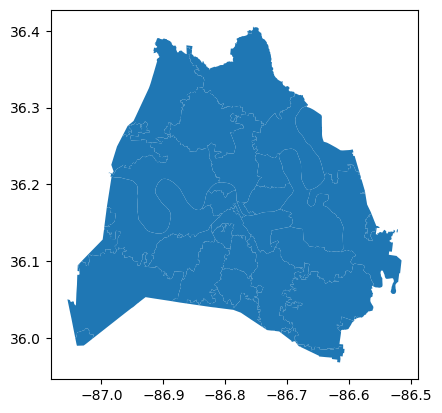

In [3]:
zipcodes.plot()

#### Load Bike racks

In [4]:
bike_racks = pd.read_csv('../data/BikeRacks_20240413.csv')
print(bike_racks.shape)
bike_racks.head(3)

(430, 13)


,the_geom,Type,OBJECTID,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788499 36.049927777764),Rack,1,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260494 36.185280037810095),Rack,2,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966654 36.1584215986261),Rack,3,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept


In [5]:
bike_geo = gpd.GeoDataFrame(bike_racks, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bike_racks['LON'], bike_racks['LAT']))

In [6]:
type(bike_geo)

geopandas.geodataframe.GeoDataFrame

#### Load Bike racks

In [10]:
parks = pd.read_csv('../data/Parks_Property_2016_20240413.csv')
print(parks.shape)
parks.head(3)
parks_geo = gpd.GeoDataFrame(parks, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(bike_racks['LON'], bike_racks['LAT']))

(287, 10)


pandas.core.frame.DataFrame

In [8]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

#### Join Zipcodes and Bike Racks

In [9]:
bike_racks_by_zip = gpd.sjoin(bike_geo, zipcodes, predicate = 'within')
test_w_parks = gpd.sjoin(parks, bike_racks_by_zip, predicate = 'within')

ValueError: 'left_df' should be GeoDataFrame, got <class 'pandas.core.frame.DataFrame'>

In [ ]:
bike_racks_by_zip.head()
test_w_parks.head()

In [ ]:
ax = zipcodes.plot(figsize = (8, 10), color = 'darkcyan')
bike_racks_by_zip.plot( ax = ax, column = 'Location');
plt.show();

#### Find Centroid

In [ ]:
pd.array(zipcodes[zipcodes['zip'] == '37201'].geometry.centroid)

In [ ]:
center = pd.array(zipcodes[zipcodes['zip'] == '37201'].geometry.centroid)[0]
print(center)

In [ ]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]
print(area_center)

In [ ]:
#create our map of Nashville Zip Code 37207 and show it
map = folium.Map(location =  area_center, zoom_start = 10)
map

### Add bike rack markers

In [ ]:
folium.GeoJson(zipcodes).add_to(map)
map

In [ ]:
#iterate through bike to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

#create a marker cluster
marker_cluster = MarkerCluster().add_to(map)

for row_index, row_values in bike_racks_by_zip.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['Capacity'])
    icon=folium.Icon(color="blue",icon="bike", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(marker_cluster)
map.save('../maps/bikeracksnashville.html')

#display our map
map

In [ ]:
# for index, row in tornados.iterrows():
#     tornados.loc[:, 'lon'] = row['geometry'].x
#     tornados.loc[:, 'lat'] = row['geometry'].y